# Explore Chl in Tara

In [15]:
# imports

from importlib import reload

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import numpy as np
from datetime import datetime, time
import random 

import pandas
import seaborn as sns

from oceancolor.tara import io as tara_io
from oceancolor.ph import pigments
from oceancolor.hydrolight import loisel23
from oceancolor.utils import cat_utils

from cnmf.oceanography import iops
from cnmf import zhu_nmf as nmf
from cnmf import io as cnmf_io

In [2]:
%matplotlib ipympl

# Load

## NMF

In [3]:
nmf_fit = 'Tara'
N_NMF, iop = 4, 'a'
d = cnmf_io.load_nmf(nmf_fit, N_NMF, iop)
M = d['M']
coeff = d['coeff']
NMF_wave = d['wave']

Loading: /home/xavier/Projects/Oceanography/python/cnmf/cnmf/data/Tara/Tara_NMF_04_a.npz


In [16]:
list(d.keys())

['M', 'coeff', 'spec', 'mask', 'err', 'wave', 'Rs', 'UID']

## Full data set

In [9]:
tara_db = tara_io.load_pg_db(expedition='Microbiome')

Reading: /home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/data/Tara/merged_tara_pacific_microbiome_acs_160124.feather


/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/io.py:83: UserWarning: Duplicate times in Tara Oceans database
  warnings.warn("Duplicate times in Tara Oceans database")


Using bit_flags removes 127034 rows of a total 774298


In [26]:
tara_Chl = tara_db['Chl_lineheight'].values

# Chl

## All of the 675nm signal is in $W_1$ and a touch of $W_0$ which we will ignore

In [7]:
NMF_Chl = coeff[:,1]

## Distribution

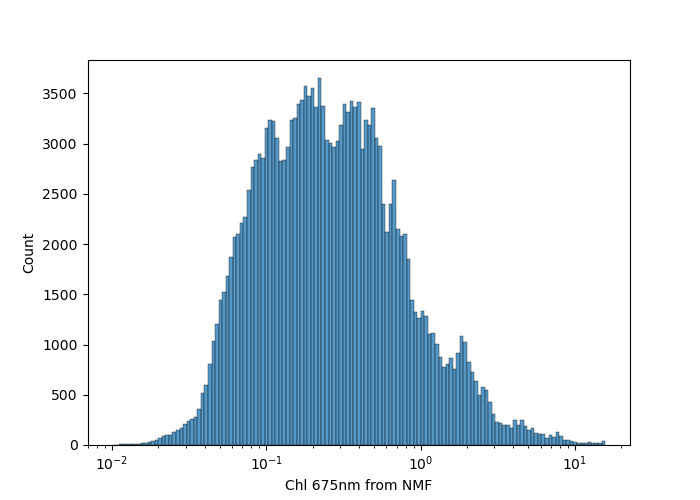

In [8]:
fig = plt.figure(figsize=(7,5))

plt.clf()
ax = plt.gca()
#
ax = sns.histplot(x=NMF_Chl[NMF_Chl > 1e-2], log_scale=True)
#
ax.set_xlabel('Chl 675nm from NMF')
#ax.set_ylabel(r'CDOM from $a_g$')
#ax.legend()
#
plt.show()

# Compare

In [21]:
mt = cat_utils.match_ids(d['UID'], tara_db.uid.values, require_in_match=False)

In [22]:
np.sum(mt==-1)

36145

## That's a bug to fix..  But let's ignore it for now

In [23]:
gd = mt >= 0

In [27]:
gd_NMF_Chl = NMF_Chl[gd]
gd_tara_Chl = tara_Chl[mt[gd]]

## Plot

In [34]:
cut = gd_NMF_Chl > 1e-3

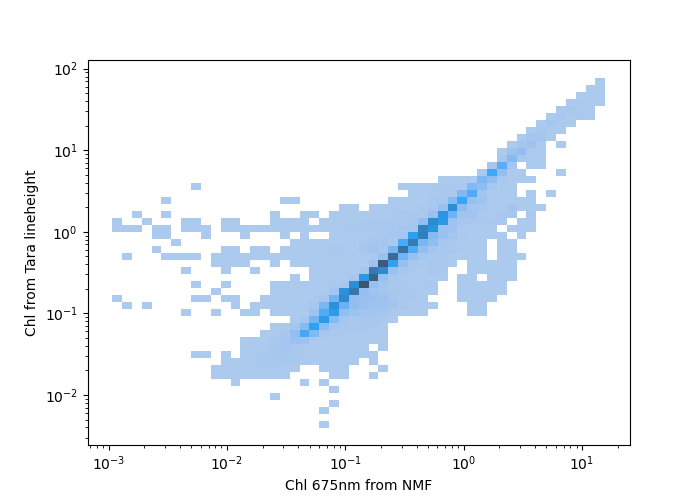

In [36]:
fig = plt.figure(figsize=(7,5))

plt.clf()
ax = plt.gca()
#
ax = sns.histplot(x=gd_NMF_Chl[cut], y=gd_tara_Chl[cut], bins=50, log_scale=True)
#
ax.set_xlabel('Chl 675nm from NMF')
ax.set_ylabel(r'Chl from Tara lineheight')
#ax.legend()
#
plt.show()